# Laboratorio 9 - Aprendizaje Estadistico
 Por: Nicolas Osorno Roa



In [ ]:
# 1. Importar datos


from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['Target'] = iris.target

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 3. Division en datos de test y de entrenamiento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'], axis=1) ,df['Target'] ,test_size=0.2, random_state=40 )

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [ ]:
# 4. Aplicar el algoritmo DecisionTreeClassifier.

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=40)

clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=40)

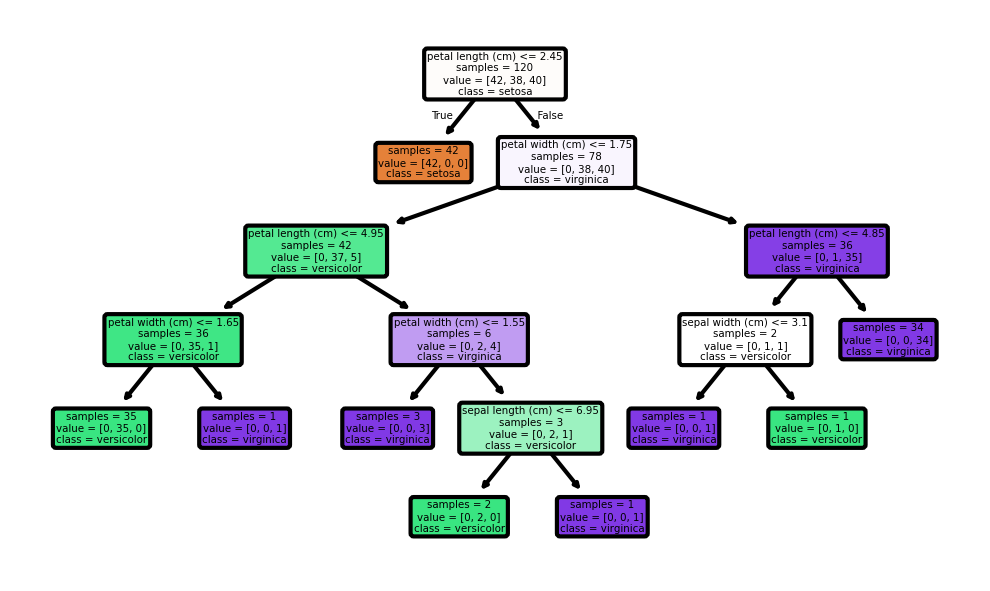

In [ ]:
# 5.Grafico de descicion
from sklearn.tree import plot_tree

ig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2.3), dpi=300)
graph= plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )



**5. Analisis Grafico de desicion:**

A modo general, para entender el arbol en su totalidad, cada cajita es un nodo. En cada uno hay una condición, en este caso desigualdades sobre alguna característica. Así, el conjunto de datos se divide en dos: los que cumplen la condición van a la iquierda y los que no, van a la derecha.

En los nodos también aparece la información de cuántos datos llegan al nodo y cuántos hay de cada clase. La ultima característica es la clase que es mayoría en ese nodo, que sería la clase que el algoritmo predice si se detuviera allí. En este caso, el árbol continúa hasta que haya solo una clase en los nodos finales; es decir, el dataset se clasifica en su totalidad, lo que podría llevar a overfitting(se puede modificar cambiano el parametro: max_depth=None).

Los nodos clave son: el primero, que clasifica completamente la clase setosa con la condición petallength ≤ 2.45. Las otras dos clases se clasifican casi totalmente con la condición del segundo nodo petal width < 1.75; pero en este caso no están divididas por completo y el algoritmo realiza un poco de overfitting para clasificar los datos rezagados.Con los dos primeros nodos la clasificación ya es excelente.

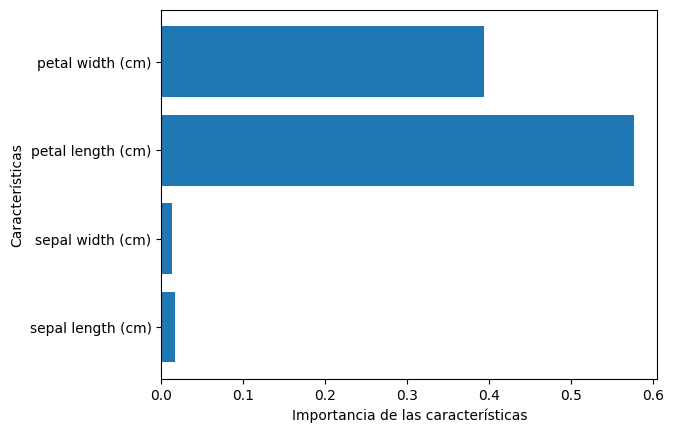

In [ ]:
# 6. Importacion de las caracteristicas

clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

Text(0.5, 1.0, 'Fronteras de Desicion para petal width (cm) vs petal length (cm)')

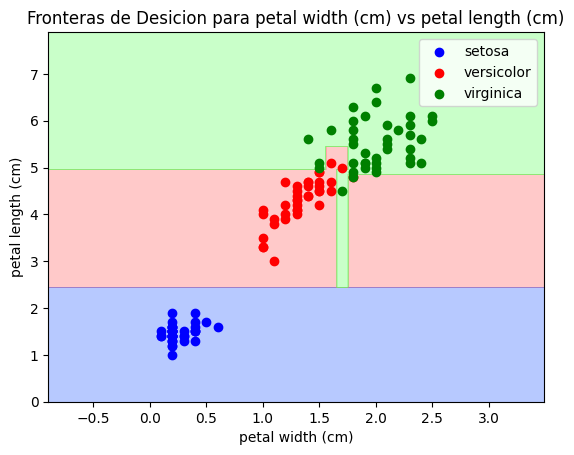

In [ ]:
# 7. Grafica fronteras de decisión para las caracteristicas descicivas petallength y petal width

from matplotlib.colors import ListedColormap

X2_train = X_train[['petal width (cm)',  'petal length (cm)']].values

clf2 = DecisionTreeClassifier(criterion='gini', random_state=40)
clf2.fit(X2_train, y_train)


x_min, x_max = X2_train[:,0].min() - 1.0, X2_train[:,0].max() + 1.0
y_min, y_max = X2_train[:,1].min() - 1.0, X2_train[:,1].max() + 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))


Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

cmap_light = ListedColormap(['#3366FF', '#FF6666', '#66FF66'])

plt.contourf(xx, yy, Z, alpha=0.35, cmap=cmap_light)
plt.scatter(X2_train[y_train==0,0], X2_train[y_train==0,1], c='blue', label = "setosa")
plt.scatter(X2_train[y_train==1,0], X2_train[y_train==1,1], c='red', label = "versicolor")
plt.scatter(X2_train[y_train==2,0], X2_train[y_train==2,1], c='green', label = "virginica")
plt.legend()
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.title('Fronteras de Desicion para petal width (cm) vs petal length (cm)')



In [ ]:
# Comprobacion calidad del modelo con los datos de test

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


y_pred = clf2.predict(X_test[['petal width (cm)',  'petal length (cm)']].values)

print("Matris de confucion: ",confusion_matrix(y_test, y_pred))

print('La Exactitud del Modelo es: ', accuracy_score(y_test, y_pred))


Matris de confucion:  [[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]
La Exactitud del Modelo es:  0.9666666666666667
